In [1]:
# Database: Central Statistics Office
# Title: CJQ06 - Recorded crime incidents (Under Reservation)
# Source: https://data.cso.ie/table/CJQ06
# File name: CJQ06.20231115T191114.csv
# Last Updated: 25/09/2023 11:00:00

# Crime Analysis in Dublin from 2003-Q1 to 2023-Q2

## Quickly Data Analysis

In [2]:
#importing dataset
import pandas as pd

dataframe = pd.read_csv("CJQ06.20231115T191114.csv")

In [3]:
num_rows, num_cols = dataframe.shape

print("Number of Rows:", num_rows)
print("Number of Columns (Attributes):", num_cols)

Number of Rows: 163016
Number of Columns (Attributes): 6


In [4]:
#analysing columns types
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163016 entries, 0 to 163015
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   STATISTIC Label  163016 non-null  object
 1   Quarter          163016 non-null  object
 2   Garda Division   163016 non-null  object
 3   Type of Offence  163016 non-null  object
 4   UNIT             163016 non-null  object
 5   VALUE            163016 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 7.5+ MB


In [5]:
#5 categorical (object) and 1 numerical (int64)

In [6]:
#analysing head dataframe
dataframe.head()

,STATISTIC Label,Quarter,Garda Division,Type of Offence,UNIT,VALUE
0,Recorded crime incidents (Under Reservation),2003Q1,Cavan/Monaghan Garda Division,Homicide offences,Number,1
1,Recorded crime incidents (Under Reservation),2003Q1,Cavan/Monaghan Garda Division,Murder,Number,0
2,Recorded crime incidents (Under Reservation),2003Q1,Cavan/Monaghan Garda Division,Manslaughter,Number,0
3,Recorded crime incidents (Under Reservation),2003Q1,Cavan/Monaghan Garda Division,Infanticide,Number,0
4,Recorded crime incidents (Under Reservation),2003Q1,Cavan/Monaghan Garda Division,Dangerous driving leading to death,Number,1


In [7]:
#analysing tail dataframe
dataframe.tail()

,STATISTIC Label,Quarter,Garda Division,Type of Offence,UNIT,VALUE
163011,Recorded crime incidents (Under Reservation),2023Q2,D.M.R. Western Garda Division,"Offences against government, justice procedure...",Number,367
163012,Recorded crime incidents (Under Reservation),2023Q2,D.M.R. Western Garda Division,Offences against government and its agents,Number,3
163013,Recorded crime incidents (Under Reservation),2023Q2,D.M.R. Western Garda Division,Organisation of crime and conspiracy to commit...,Number,0
163014,Recorded crime incidents (Under Reservation),2023Q2,D.M.R. Western Garda Division,Perverting the course of justice,Number,1
163015,Recorded crime incidents (Under Reservation),2023Q2,D.M.R. Western Garda Division,"Offences while in custody, breach of court orders",Number,363


# Data Preparation

## Removing unnecessary columns

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163016 entries, 0 to 163015
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   STATISTIC Label  163016 non-null  object
 1   Quarter          163016 non-null  object
 2   Garda Division   163016 non-null  object
 3   Type of Offence  163016 non-null  object
 4   UNIT             163016 non-null  object
 5   VALUE            163016 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 7.5+ MB


In [9]:
dataframe["STATISTIC Label"].unique()

array(['Recorded crime incidents (Under Reservation)'], dtype=object)

In [10]:
dataframe = dataframe.drop(["STATISTIC Label"], axis=1)

In [11]:
dataframe["UNIT"].unique()

array(['Number'], dtype=object)

In [12]:
dataframe = dataframe.drop(["UNIT"], axis=1)

In [13]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163016 entries, 0 to 163015
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Quarter          163016 non-null  object
 1   Garda Division   163016 non-null  object
 2   Type of Offence  163016 non-null  object
 3   VALUE            163016 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


## Characterisation of the dataset

In [14]:
#check if has null values in target column
dataframe.isnull().sum()

Quarter            0
Garda Division     0
Type of Offence    0
VALUE              0
dtype: int64

In [15]:
#check if has zero values in target column
dataframe[dataframe["VALUE"] == 0].shape

(49988, 4)

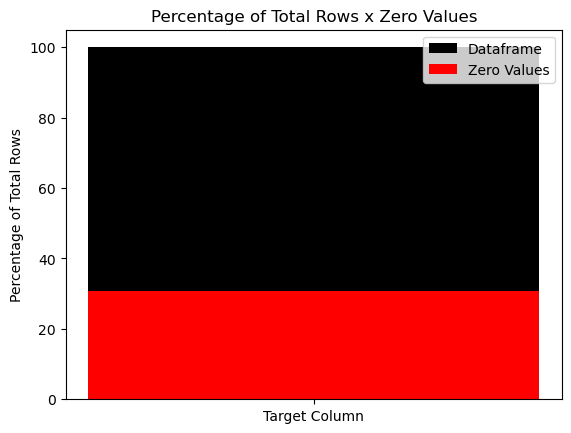

In [16]:
import matplotlib.pyplot as plt

# Create two dataframes: one for the entire data and another for zero values
target = dataframe[["VALUE"]]
zero_values = target[target["VALUE"] == 0]

# Values to compare
values_to_compare = [100, zero_values.shape[0] / target.shape[0] * 100]

# Plot the values in the same candlestick
plt.bar('Target Column', values_to_compare[0], color='black', label='Dataframe')
plt.bar('Target Column', values_to_compare[1], color='red', label='Zero Values')

# Customize the plot
plt.ylabel('Percentage of Total Rows')
plt.title('Percentage of Total Rows x Zero Values')
plt.legend()

# Show the plot
plt.show()

In [17]:
#remove zero values on target column
dataframe = dataframe[dataframe["VALUE"] != 0]

## Size, number of attributes, number of observations

In [18]:
num_rows, num_cols = dataframe.shape

print("Number of Rows:", num_rows)
print("Number of Columns (Attributes):", num_cols)

Number of Rows: 113028
Number of Columns (Attributes): 4


# EDA and Visualizations

## Filtering Garda Divisions

In [19]:
#list Garda divisions of dataset
dataframe["Garda Division"].unique()

array(['Cavan/Monaghan Garda Division', 'Donegal Garda Division',
       'Sligo/Leitrim Garda Division', 'Louth Garda Division',
       'Clare Garda Division', 'Mayo Garda Division',
       'Galway Garda Division', 'Roscommon/Longford Garda Division',
       'Cork City Garda Division', 'Cork North Garda Division',
       'Cork West Garda Division', 'Kerry Garda Division',
       'Limerick Garda Division', 'Laois/Offaly Garda Division',
       'Meath Garda Division', 'Wicklow Garda Division',
       'Westmeath Garda Division', 'Kildare Garda Division',
       'Tipperary Garda Division', 'Wexford Garda Division',
       'Kilkenny/Carlow Garda Division', 'Waterford Garda Division',
       'D.M.R. South Central Garda Division',
       'D.M.R. North Central Garda Division',
       'D.M.R. Northern Garda Division', 'D.M.R. Southern Garda Division',
       'D.M.R. Eastern Garda Division', 'D.M.R. Western Garda Division'],
      dtype=object)

In [20]:
#creating a new dataframe with Dublin divisions
dublin_divisions = ["D.M.R. South Central Garda Division",
                    "D.M.R. North Central Garda Division",
                    "D.M.R. Northern Garda Division",
                    "D.M.R. Southern Garda Division",
                    "D.M.R. Eastern Garda Division",
                    "D.M.R. Western Garda Division"]

dataframe = dataframe[dataframe["Garda Division"].isin(dublin_divisions)]

In [21]:
#show filtered dataframe with Dublin divisions
dataframe["Garda Division"].unique()

array(['D.M.R. South Central Garda Division',
       'D.M.R. North Central Garda Division',
       'D.M.R. Northern Garda Division', 'D.M.R. Southern Garda Division',
       'D.M.R. Eastern Garda Division', 'D.M.R. Western Garda Division'],
      dtype=object)

In [22]:
## Filtering Crime Offences

In [23]:
#list crime offences of dataset
dataframe["Type of Offence"].unique()

array(['Homicide offences', 'Murder', 'Manslaughter', 'Sexual offences',
       'Rape and sexual assault',
       'Attempts/threats to murder, assaults, harassments and related offences',
       'Harassment and related offences',
       'Assault causing harm, poisoning', 'Other assault',
       'Dangerous or negligent acts',
       'Driving/in charge of a vehicle while over legal alcohol limit',
       'Endangering traffic offences',
       'Robbery, extortion and hijacking offences',
       'Robbery of an establishment or institution',
       'Robbery of cash or goods in transit', 'Robbery from the person',
       'Carjacking, hijacking/unlawful seizure of aircraft/vessel',
       'Burglary and related offences', 'Aggravated burglary',
       'Burglary (not aggravated)',
       'Possession of an article (with intent to burgle, steal, demand)',
       'Theft and related offences',
       'Theft/taking of vehicle and related offences',
       'Theft from person', 'Theft from shop',
    

In [24]:
#show number of crime offences of dataset
dataframe["Type of Offence"].nunique()

71

In [25]:
#creating a new dataframe with crime offences
offences = ["Homicide offences",
            "Murder",
            "Manslaughter",
            "Sexual offences",
            "Rape and sexual assault"]

dataframe = dataframe[dataframe["Type of Offence"].isin(offences)]

In [26]:
#show filtered dataframe with crime offences
dataframe["Type of Offence"].unique()

array(['Homicide offences', 'Murder', 'Manslaughter', 'Sexual offences',
       'Rape and sexual assault'], dtype=object)

## Crimes in Dublin from 2003-Q1 to 2023-Q2

<Figure size 1200x800 with 0 Axes>

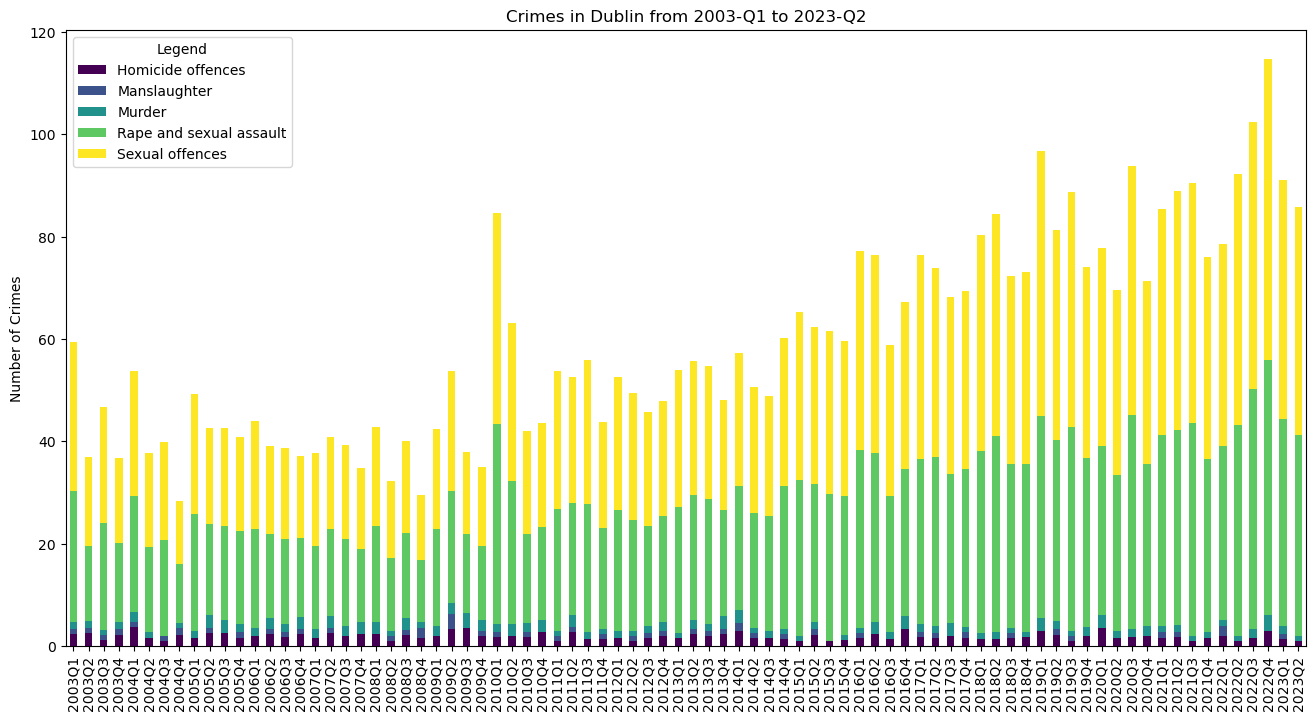

In [27]:
import matplotlib.pyplot as plt

# Pivot the DataFrame for better plotting
pivot_df = dataframe.pivot_table(index=['Quarter'], columns='Type of Offence', values='VALUE', fill_value=0)

# Create a grouped bar plot
plt.figure(figsize=(12, 8))
pivot_df.plot(kind='bar', stacked=True, colormap='viridis', figsize=(16, 8))

plt.title('Crimes in Dublin from 2003-Q1 to 2023-Q2')
plt.xlabel('')
plt.ylabel('Number of Crimes')
plt.legend(title='Legend')
plt.show()

In [28]:
#we can also filter our dataset by Garda divisions and plot using the code snippet before

south_central = dataframe[dataframe["Garda Division"] == "D.M.R. South Central Garda Division"]
north_central = dataframe[dataframe["Garda Division"] == "D.M.R. North Central Garda Division"]
northern_central = dataframe[dataframe["Garda Division"] == "D.M.R. Northern Central Garda Division"]
southern_central = dataframe[dataframe["Garda Division"] == "D.M.R. Southern Central Garda Division"]
eastern_central = dataframe[dataframe["Garda Division"] == "D.M.R. Eastern Central Garda Division"]
western_central = dataframe[dataframe["Garda Division"] == "D.M.R. Western Central Garda Division"]

## Splitting relevant features

In [29]:
categorical_features = dataframe[['Quarter', 'Garda Division', 'Type of Offence']]
target = dataframe['VALUE']

In [30]:
#show categorical features data
categorical_features

,Quarter,Garda Division,Type of Offence
1562,2003Q1,D.M.R. South Central Garda Division,Homicide offences
1563,2003Q1,D.M.R. South Central Garda Division,Murder
1564,2003Q1,D.M.R. South Central Garda Division,Manslaughter
1567,2003Q1,D.M.R. South Central Garda Division,Sexual offences
1568,2003Q1,D.M.R. South Central Garda Division,Rape and sexual assault
...,...,...,...
162880,2023Q2,D.M.R. Eastern Garda Division,Rape and sexual assault
162945,2023Q2,D.M.R. Western Garda Division,Homicide offences
162946,2023Q2,D.M.R. Western Garda Division,Murder
162950,2023Q2,D.M.R. Western Garda Division,Sexual offences


In [31]:
#show target data
target

1562       2
1563       1
1564       1
1567      13
1568      13
          ..
162880    23
162945     1
162946     1
162950    45
162951    34
Name: VALUE, Length: 1597, dtype: int64

## Converting categorical features in numerical features

In [32]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le = LabelEncoder()
features = pd.DataFrame()
features['Quarter'] = le.fit_transform(categorical_features['Quarter'])
features['Garda Division'] = le.fit_transform(categorical_features['Garda Division'])
features['Type of Offence'] = le.fit_transform(categorical_features['Type of Offence'])

In [33]:
#show numerical features data
features

,Quarter,Garda Division,Type of Offence
0,0,3,0
1,0,3,2
2,0,3,1
3,0,3,4
4,0,3,3
...,...,...,...
1592,81,0,3
1593,81,5,0
1594,81,5,2
1595,81,5,4


## PCA to Establish Minimum Number of Features

In [34]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(features)

PCA()

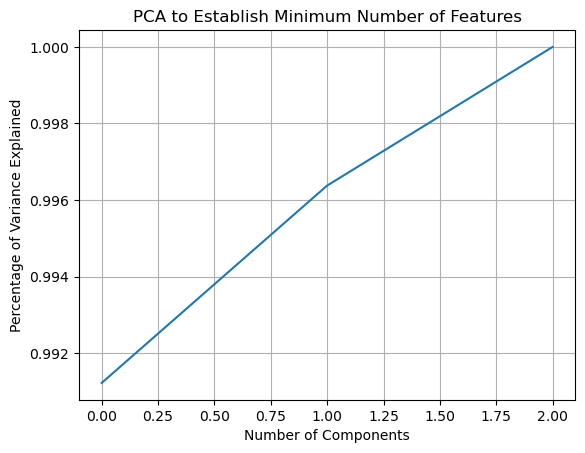

In [35]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('PCA to Establish Minimum Number of Features')
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Variance Explained');
plt.grid(True)

## Implement PCA to Dimensionally Reduce the Data to the Number of Features 

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [37]:
from sklearn.decomposition import PCA

pca = PCA(3)
features_pca = pca.fit_transform(features_scaled)

In [38]:
reduced_features = pd.DataFrame(features_pca, columns =['C1', 'C2', 'C3'])
reduced_features.head()

,C1,C2,C3
0,1.989623,1.266969,0.469470
1,1.018266,1.277795,-0.510443
2,1.503944,1.272382,-0.020487
3,0.046908,1.288620,-1.490357
4,0.532587,1.283208,-1.000400


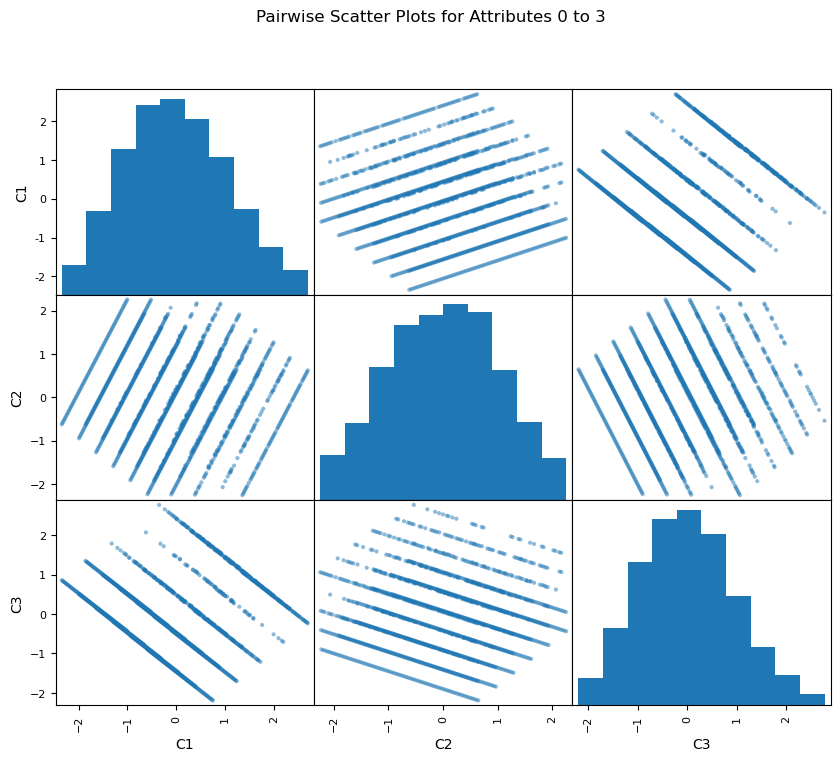

In [39]:
from pandas.plotting import scatter_matrix

scatter_matrix(reduced_features.iloc[:, 0:3], alpha=0.5, figsize=(10, 8))
plt.suptitle("Pairwise Scatter Plots for Attributes 0 to 3")
plt.show()

# Machine Learning

## Split the data into training and testing sets

In [40]:
#hiding possible warnings that won't affect our results
import warnings
warnings.filterwarnings("ignore")

In [41]:
from sklearn.model_selection import train_test_split

X = reduced_features
y = target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [43]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('K-Nearest Neighbors', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Support Vector Machine', SVC(gamma='auto')))

In [44]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('\n%s\nMean: %f\nStandard Deviation: %f' % (name, cv_results.mean(), cv_results.std()))


Logistic Regression
Mean: 0.263103
Standard Deviation: 0.014256

Linear Discriminant Analysis
Mean: 0.285790
Standard Deviation: 0.019946

K-Nearest Neighbors
Mean: 0.271777
Standard Deviation: 0.023269

Decision Tree
Mean: 0.238072
Standard Deviation: 0.025845

Naive Bayes
Mean: 0.266209
Standard Deviation: 0.014956

Support Vector Machine
Mean: 0.273278
Standard Deviation: 0.010796


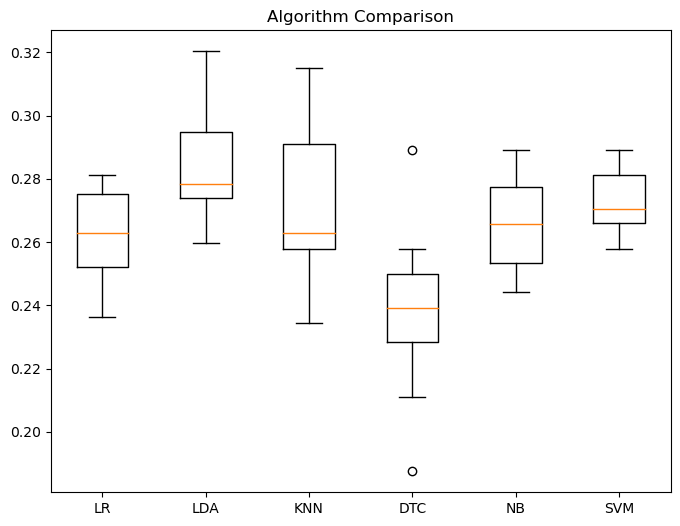

In [45]:
plt.figure(figsize=(8, 6))
plt.boxplot(results, labels=['LR', 'LDA', 'KNN', 'DTC', 'NB', 'SVM'])
plt.title('Algorithm Comparison')
plt.show()